# Weight matrix analysis for $L=10$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(12)

import sys
sys.path.append('/modules')
from modules.mc_ising2d import IsingMC
from modules.net import Net
from rbm import RBM

Tc_Ons = 2 / ( np.log(1 + np.sqrt(2)) )
Tc_MF = 4.0
L = 10

Loading the RBM models.

In [2]:
rbm_L010_all = RBM()
rbm_L010_all = torch.load('RBM_trained_models/RBM_model_T_complete_MF_nv100_nh100_lr1.0E-03_k1_bsize100_nepochs20000.pt',
                 map_location=torch.device('cpu'))

W_L010_all, v, h = rbm_L010_all.parameters()
del v
del h


rbm_L010_low = RBM()
rbm_L010_low = torch.load('RBM_trained_models/RBM_model_T_L_low_nv100_nh100_lr1.0E-02_k1_bsize100_nepochs5000.pt',
                 map_location=torch.device('cpu'))

W_L010_low, v, h = rbm_L010_low.parameters()
del v
del h


rbm_L010_high = RBM()
rbm_L010_high = torch.load('RBM_trained_models/RBM_model_T_H_high_nv100_nh100_lr1.0E-02_k1_bsize100_nepochs5000.pt',
                 map_location=torch.device('cpu'))

W_L010_high, v, h = rbm_L010_high.parameters()
del v
del h


rbm_L010_low_high = RBM()
rbm_L010_low_high = torch.load('RBM_trained_models/RBM_model_T_zero_inf_nv100_nh100_lr1.0E-02_k1_bsize100_nepochs30000.pt',
                 map_location=torch.device('cpu'))

W_L010_low_high, v, h = rbm_L010_low_high.parameters()
del v
del h

/home/rodsveiga/anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'rbm.RBM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


## Complete

### Analysis of $ {\cal W}$

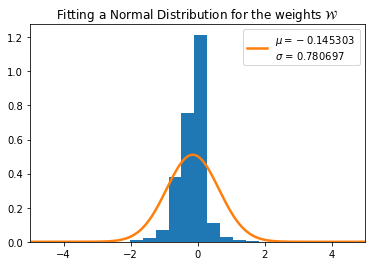

In [5]:
W_ = W_L010_all.numpy().reshape((W_L010_all.shape[0]*W_L010_all.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma$ = %f' % (muW_, sigmaW_ ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.xlim([-5, 5])
plt.show()

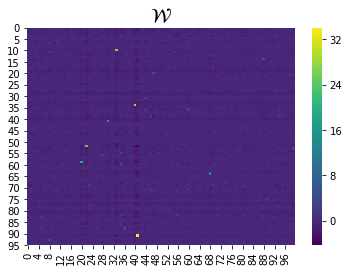

In [3]:
plt.title('${\cal W} $', fontsize= 20)
sns.heatmap(W_L010_all, linewidths= 0.0, cmap= 'viridis')
plt.show()

#### SVD of ${\cal W} $

In [3]:
u_L010_all, s_L010_all, v_L010_all = torch.svd(W_L010_all)

[]

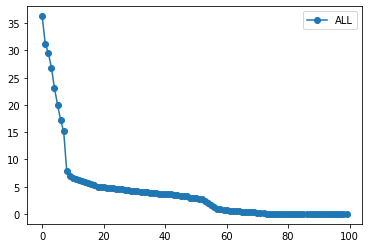

In [60]:
plt.plot(s_L010_all.numpy(), label= 'ALL', marker= 'o')
plt.legend()
plt.plot()

#### Sampling Ising states using the left singular vectors $u$

mag =  0.04000


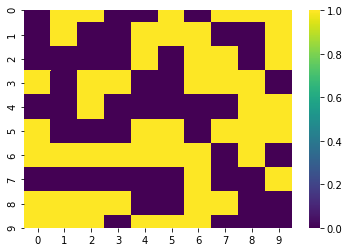

mag =  0.14000


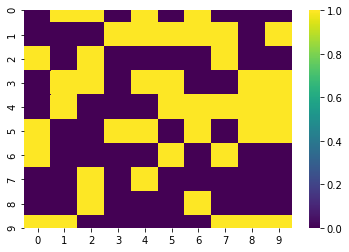

mag =  0.10000


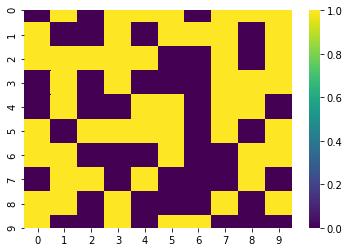

mag =  0.02000


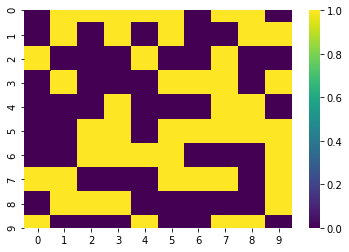

mag =  0.08000


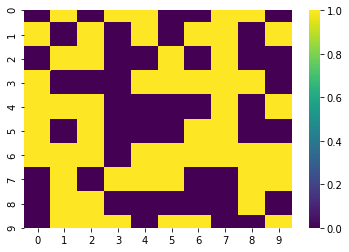

mag =  0.00000


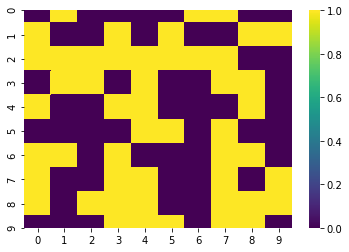

mag =  0.08000


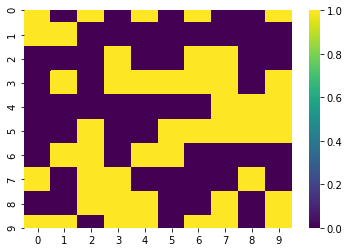

mag =  0.14000


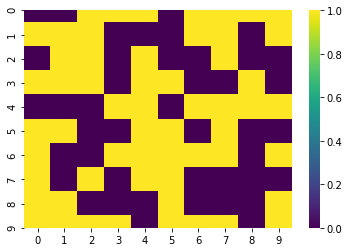

mag =  0.12000


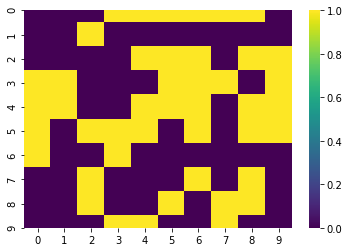

mag =  0.02000


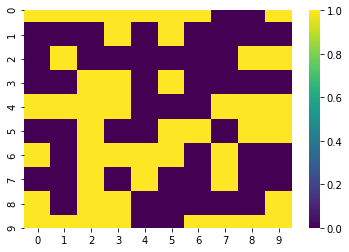

mag =  0.08000


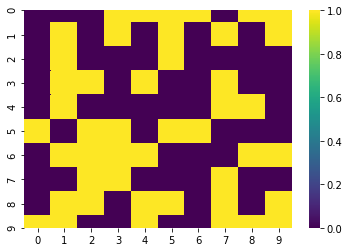

mag =  0.12000


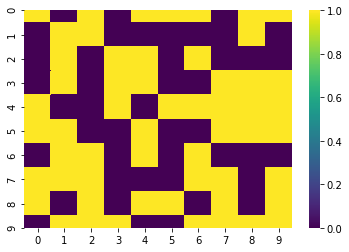

mag =  0.08000


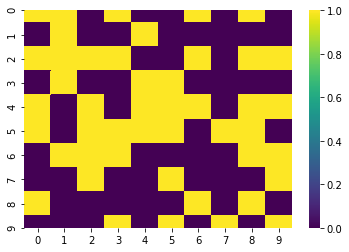

mag =  0.06000


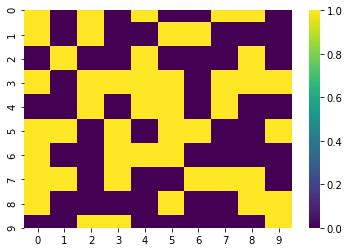

mag =  0.08000


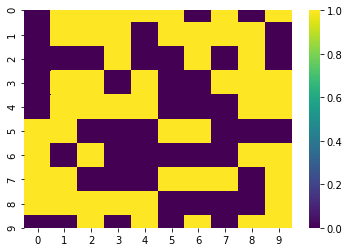

In [9]:
for j in range(15):
    p = torch.sigmoid(u_L010_all[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Sampling Ising states using the right singular vectors $v$

mag =  0.06000


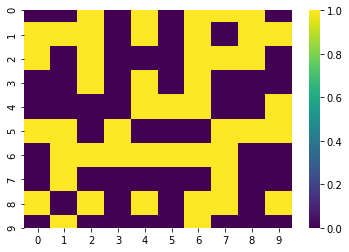

mag =  0.18000


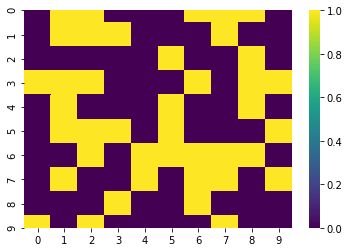

mag =  0.06000


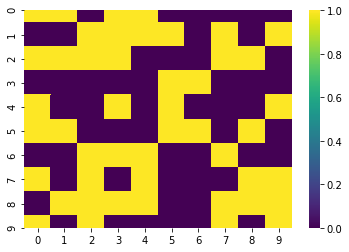

mag =  0.10000


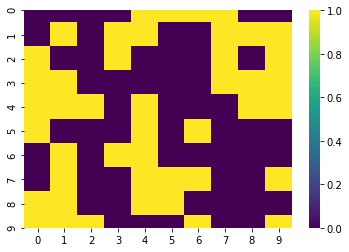

mag =  0.16000


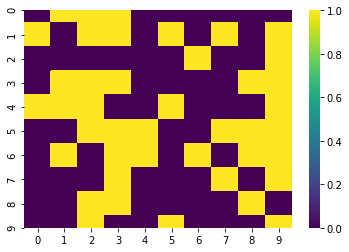

mag =  0.10000


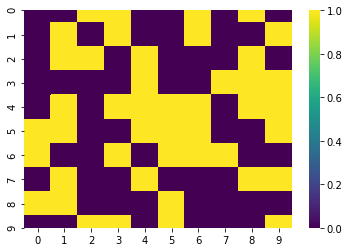

mag =  0.08000


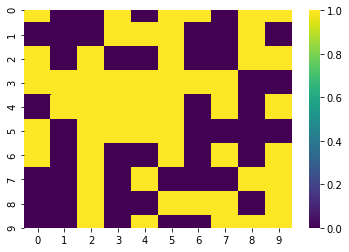

mag =  0.10000


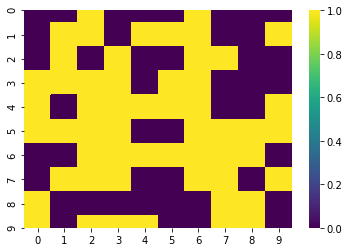

mag =  0.04000


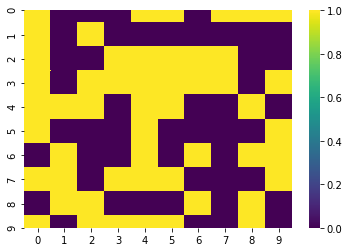

mag =  0.06000


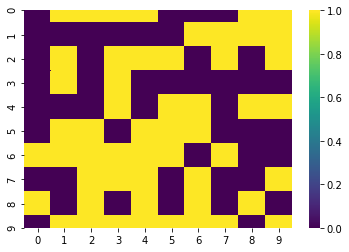

mag =  0.08000


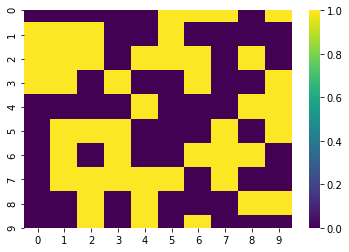

mag =  0.08000


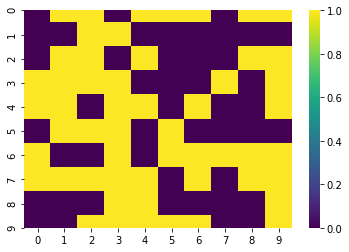

mag =  0.24000


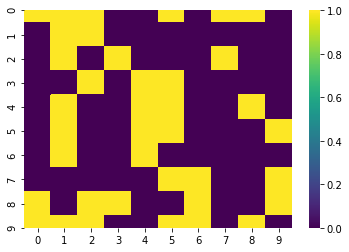

mag =  0.04000


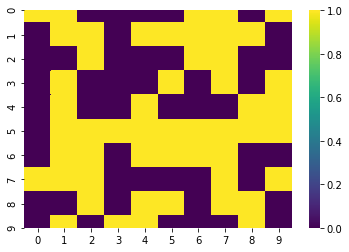

mag =  0.10000


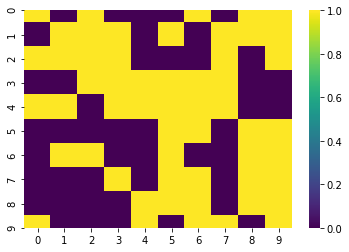

In [10]:
for j in range(15):
    p = torch.sigmoid(v_L010_all[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Eigenvalues of ${\cal W} $

There are imaginary eigenvalues.

In [36]:
eigen_val_vec_all_W = torch.eig(W_L010_all, eigenvectors= True)

In [38]:
eigen_all_W = eigen_val_vec_all_W[0]
eigen_all_W

tensor([[-1.7390e+01,  0.0000e+00],
        [ 4.6712e+00,  0.0000e+00],
        [ 1.7348e+00,  4.2377e+00],
        [ 1.7348e+00, -4.2377e+00],
        [-3.6694e+00,  2.0546e+00],
        [-3.6694e+00, -2.0546e+00],
        [-4.0649e+00,  8.0627e-01],
        [-4.0649e+00, -8.0627e-01],
        [ 3.6053e+00,  1.5202e+00],
        [ 3.6053e+00, -1.5202e+00],
        [ 2.9771e+00,  2.4023e+00],
        [ 2.9771e+00, -2.4023e+00],
        [ 9.5147e-01,  3.7149e+00],
        [ 9.5147e-01, -3.7149e+00],
        [ 2.4886e-01,  3.5869e+00],
        [ 2.4886e-01, -3.5869e+00],
        [-9.2263e-01,  3.4415e+00],
        [-9.2263e-01, -3.4415e+00],
        [ 3.4747e+00,  0.0000e+00],
        [ 3.1564e+00,  1.2088e+00],
        [ 3.1564e+00, -1.2088e+00],
        [-2.6159e+00,  2.0794e+00],
        [-2.6159e+00, -2.0794e+00],
        [-3.3165e+00,  0.0000e+00],
        [ 1.4477e+00,  2.7760e+00],
        [ 1.4477e+00, -2.7760e+00],
        [-2.8418e+00,  4.0368e-01],
        [-2.8418e+00, -4.036

### Analysis of $ {\cal W} {\cal W}^{T}$

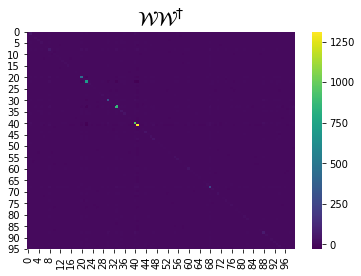

In [7]:
WW = torch.mm(W_L010_all.t(), W_L010_all)
sns.heatmap(WW, linewidths= 0.0, cmap= 'viridis')
plt.title('${\cal W} {\cal W}^{\dag}$', fontsize= 20)
plt.show()

#### Eigenvalues of ${\cal W} {\cal W}^T $

In [8]:
eigen_val_vec = torch.eig(W_L010_all*W_L010_all.t(), eigenvectors= True)

In [12]:
eigen_ALL = eigen_val_vec[0][:,0]

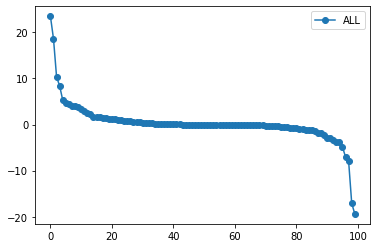

In [58]:
plt.plot(x, np.sort(eigen_ALL.numpy()), label= 'ALL', marker= 'o')
plt.legend()
plt.show()

In [79]:
eigen_val_vec[1][0]

tensor([-0.0568, -0.0150, -0.0300,  0.0419, -0.0036,  0.0146, -0.0141, -0.0476,
         0.0155,  0.0547, -0.0038,  0.0506, -0.1173, -0.0126,  0.1356, -0.0492,
         0.0479, -0.0355, -0.0494,  0.0836,  0.0698,  0.0131,  0.1199,  0.0455,
        -0.1218,  0.1534,  0.0262,  0.0048, -0.1505, -0.1280,  0.2211,  0.1923,
        -0.0580,  0.1284, -0.0593, -0.0753, -0.0358,  0.0797, -0.0126,  0.0178,
        -0.2278,  0.2666, -0.0075,  0.3580,  0.0699, -0.0729,  0.0020,  0.0477,
        -0.2143, -0.1545, -0.1887,  0.2754,  0.2875, -0.1559, -0.0688,  0.0598,
        -0.1385, -0.1211, -0.0024,  0.1394, -0.0602,  0.0111,  0.0815, -0.1303,
        -0.1112,  0.1204, -0.0009, -0.0777,  0.0006,  0.0162,  0.0325, -0.0891,
        -0.0550, -0.0810, -0.0203,  0.0551, -0.0484,  0.0157, -0.0052, -0.0152,
         0.0070, -0.0275,  0.0617, -0.0529,  0.0229,  0.0157, -0.0495,  0.0070,
         0.0227, -0.0106,  0.0190,  0.0015, -0.0231, -0.0159,  0.0005, -0.0285,
         0.0162,  0.0295, -0.0374,  0.01

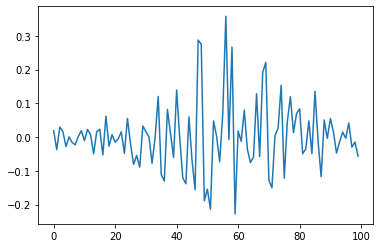

In [80]:
plt.plot(np.flip(np.arange(100)), eigen_val_vec[1][0].numpy()  )

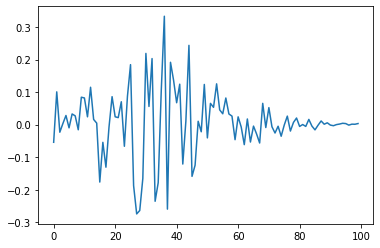

In [81]:
plt.plot(np.flip(np.arange(100)), eigen_val_vec[1][-1].numpy()  )

## Low

### Analysis of $ {\cal W}$

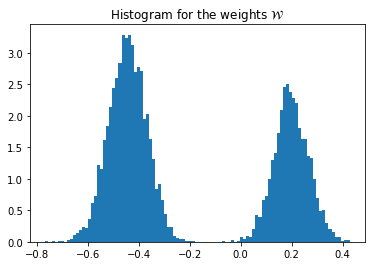

In [23]:
W_ = W_L010_low.numpy().reshape((W_L010_low.shape[0]*W_L010_low.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
#x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
#domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
#muW_, sigmaW_ = stats.norm.fit(W_) 

#plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


#plt.plot(domain, plot_pdf, linewidth= 2.5,
#         label= '$\mu= %f$ \n$\sigma$ = %f' % (muW_, sigmaW_ ))

plt.title('Histogram for the weights ${\cal W}$')
#plt.legend()
#plt.xlim([-1.5, 1.5])
plt.show()

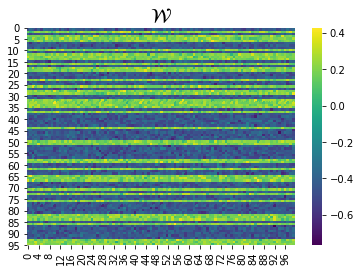

In [4]:
plt.title('${\cal W} $', fontsize= 20)
sns.heatmap(W_L010_low, linewidths= 0.0, cmap= 'viridis')
plt.show()

#### SVD of ${\cal W} $

In [6]:
u_L010_low, s_L010_low, v_L010_low = torch.svd(W_L010_low)

[]

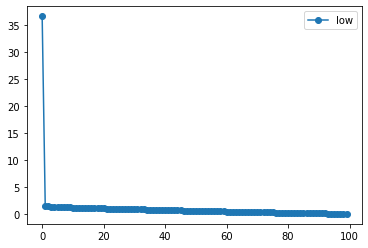

In [57]:
plt.plot(s_L010_low.numpy(), label= 'low', marker= 'o')
plt.legend()
plt.plot()

#### Sampling Ising states using the left singular vectors $u$

mag =  0.08000


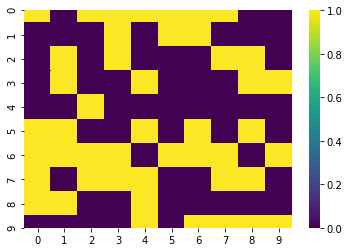

mag =  0.10000


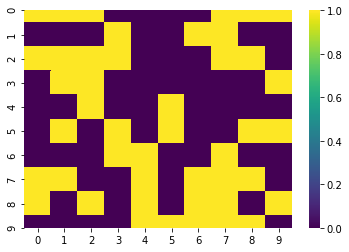

mag =  0.12000


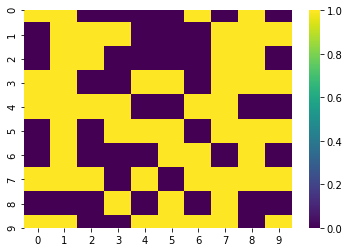

mag =  0.08000


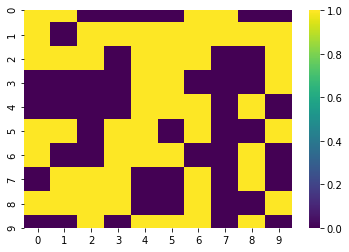

mag =  0.00000


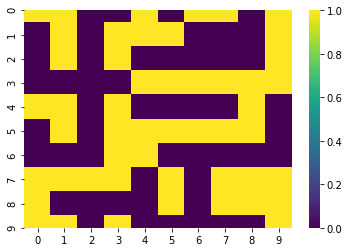

mag =  0.18000


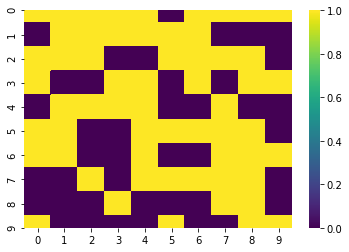

mag =  0.04000


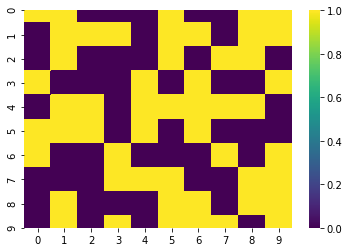

mag =  0.14000


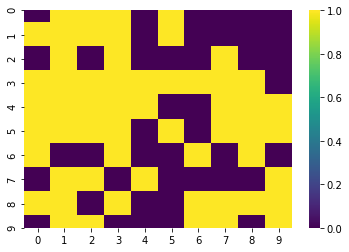

mag =  0.04000


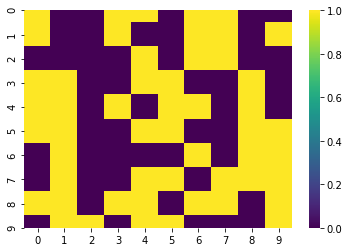

mag =  0.04000


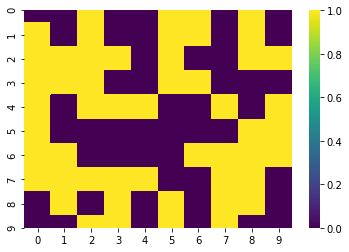

mag =  0.02000


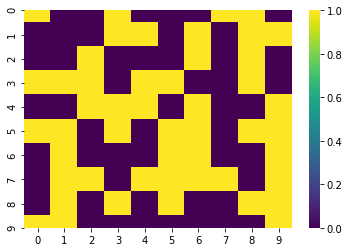

mag =  0.06000


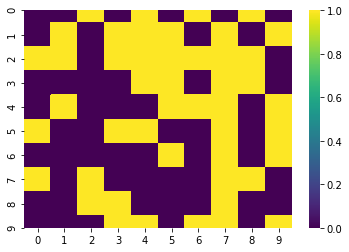

mag =  0.08000


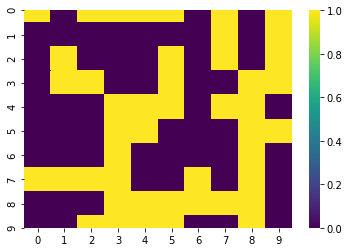

mag =  0.08000


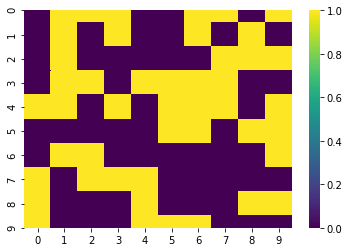

mag =  0.00000


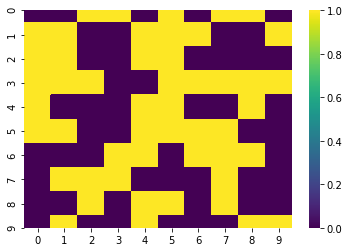

In [11]:
for j in range(15):
    p = torch.sigmoid(u_L010_low[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Sampling Ising states using the right singular vectors $v$

mag =  0.10000


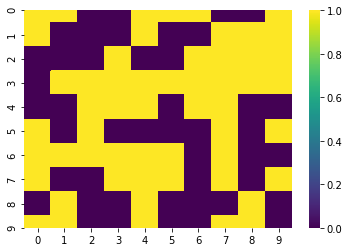

mag =  0.12000


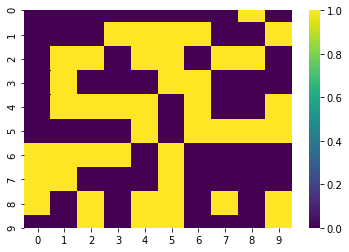

mag =  0.04000


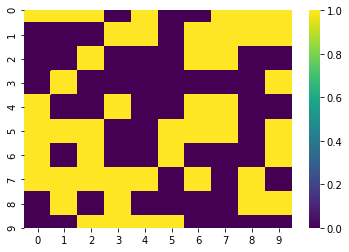

mag =  0.02000


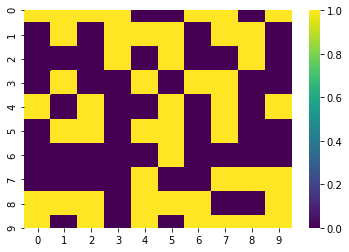

mag =  0.02000


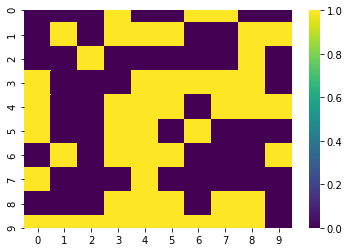

mag =  0.10000


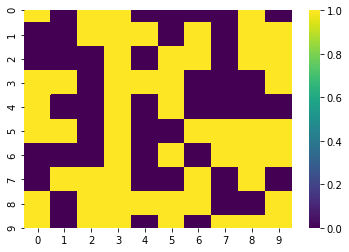

mag =  0.06000


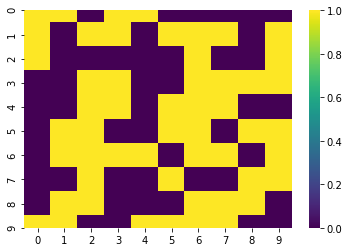

mag =  0.20000


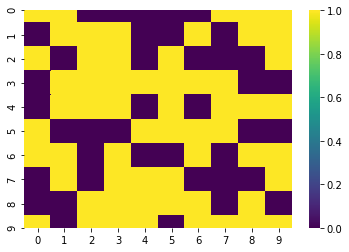

mag =  0.18000


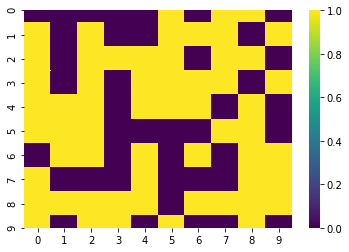

mag =  0.08000


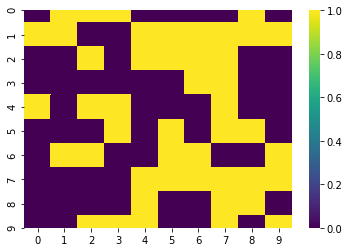

mag =  0.02000


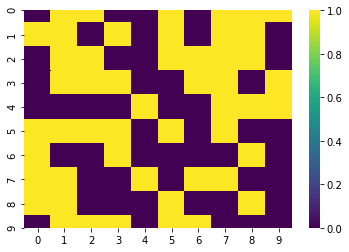

mag =  0.14000


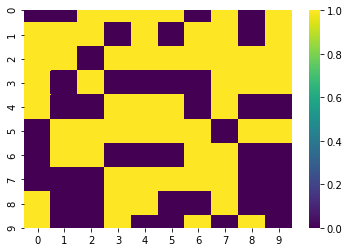

mag =  0.08000


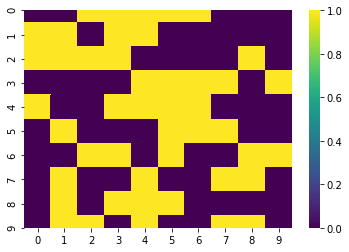

mag =  0.04000


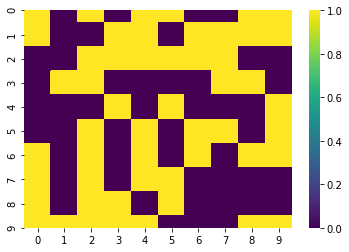

mag =  0.16000


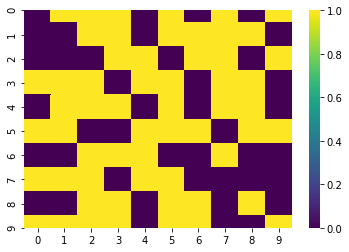

In [12]:
for j in range(15):
    p = torch.sigmoid(v_L010_low[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Eigenvalues of ${\cal W} $

There are imaginary eigenvalues.

In [41]:
eigen_val_vec_low_W = torch.eig(W_L010_low, eigenvectors= True)

In [42]:
eigen_low_W = eigen_val_vec_low_W[0]
eigen_low_W

tensor([[-1.8667e+01,  0.0000e+00],
        [ 4.3837e-01,  5.6659e-01],
        [ 4.3837e-01, -5.6659e-01],
        [-1.6918e-01,  7.1422e-01],
        [-1.6918e-01, -7.1422e-01],
        [ 5.2475e-02,  7.0149e-01],
        [ 5.2475e-02, -7.0149e-01],
        [-7.0717e-01,  0.0000e+00],
        [-6.2920e-01,  2.4771e-01],
        [-6.2920e-01, -2.4771e-01],
        [-3.9966e-01,  5.6753e-01],
        [-3.9966e-01, -5.6753e-01],
        [ 6.8764e-01,  0.0000e+00],
        [-5.5114e-01,  3.7152e-01],
        [-5.5114e-01, -3.7152e-01],
        [-3.5008e-01,  5.9144e-01],
        [-3.5008e-01, -5.9144e-01],
        [ 5.7531e-01,  3.6065e-01],
        [ 5.7531e-01, -3.6065e-01],
        [-6.4623e-01,  6.4266e-02],
        [-6.4623e-01, -6.4266e-02],
        [ 5.4978e-01,  3.3461e-01],
        [ 5.4978e-01, -3.3461e-01],
        [ 6.5251e-01,  0.0000e+00],
        [-4.1594e-01,  4.7560e-01],
        [-4.1594e-01, -4.7560e-01],
        [ 2.5253e-01,  5.5404e-01],
        [ 2.5253e-01, -5.540

### Analysis of $ {\cal W} {\cal W}^{T}$

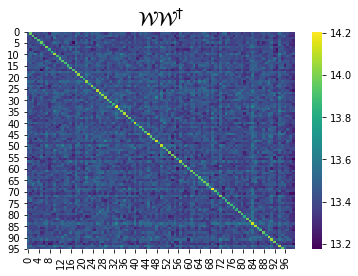

In [24]:
WW = torch.mm(W_L010_low.t(), W_L010_low)
sns.heatmap(WW, linewidths= 0.0, cmap= 'viridis')
plt.title('${\cal W} {\cal W}^{\dag}$', fontsize= 20)
plt.show()

#### Eigenvalues of ${\cal W} {\cal W}^T $

In [25]:
eigen_val_vec_low = torch.eig(W_L010_low*W_L010_low.t(), eigenvectors= True)

In [26]:
eigen_LOW = eigen_val_vec_low[0][:,0]

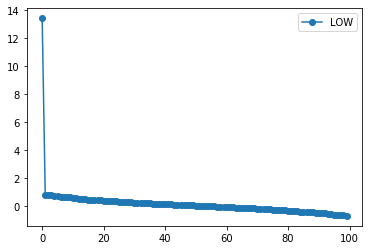

In [56]:
plt.plot(x, np.sort(eigen_LOW.numpy()), label= 'LOW', marker= 'o')
plt.legend()
plt.show()

## High

### Analysis of $ {\cal W}$

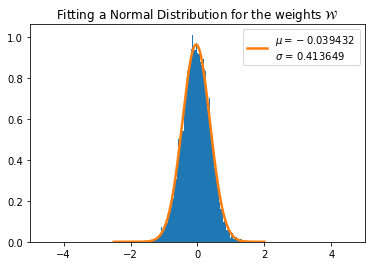

In [28]:
W_ = W_L010_high.numpy().reshape((W_L010_high.shape[0]*W_L010_high.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma$ = %f' % (muW_, sigmaW_ ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.xlim([-5, 5])
plt.show()

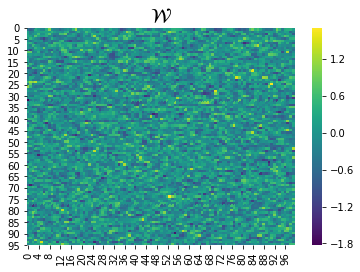

In [5]:
plt.title('${\cal W} $', fontsize= 20)
sns.heatmap(W_L010_high, linewidths= 0.0, cmap= 'viridis')
plt.show()

#### SVD of ${\cal W} $

In [7]:
u_L010_high, s_L010_high, v_L010_high = torch.svd(W_L010_high)

[]

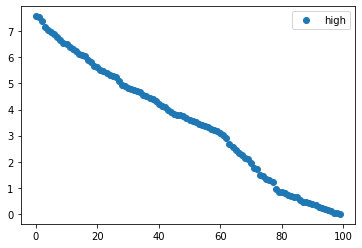

In [55]:
plt.plot(s_L010_high.numpy(), 'o', label= 'high', marker= 'o')
plt.legend()
plt.plot()

#### Sampling Ising states using the left singular vectors $u$

mag =  0.00000


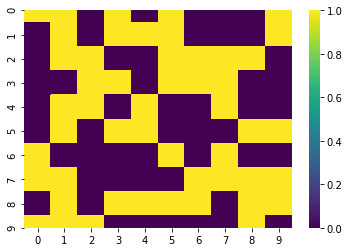

mag =  0.14000


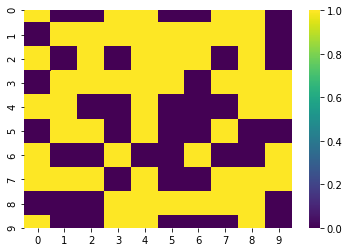

mag =  0.02000


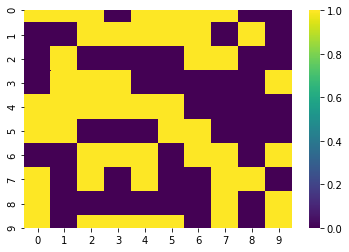

mag =  0.02000


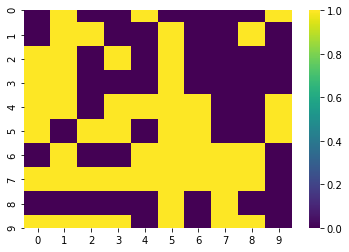

mag =  0.02000


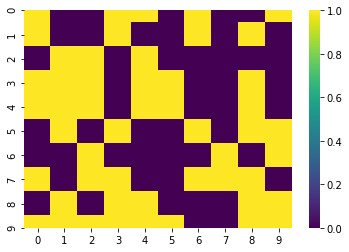

mag =  0.04000


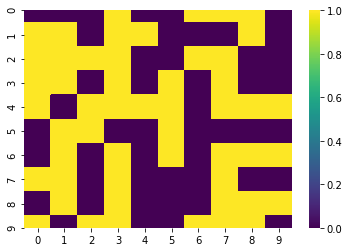

mag =  0.08000


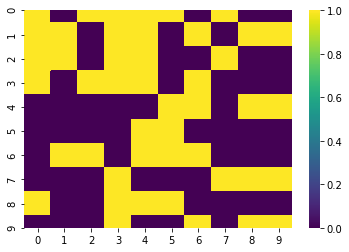

mag =  0.20000


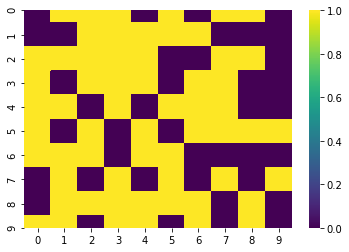

mag =  0.10000


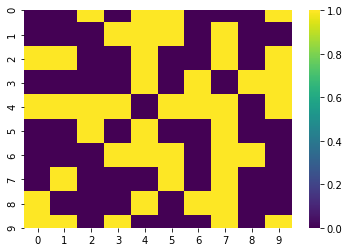

mag =  0.02000


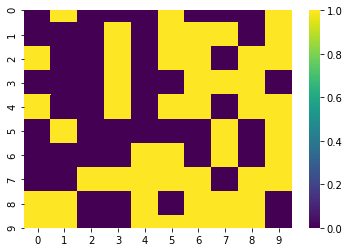

mag =  0.06000


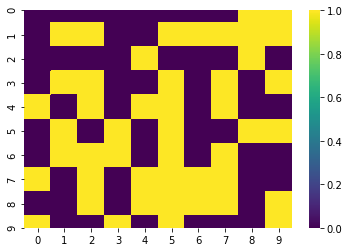

mag =  0.12000


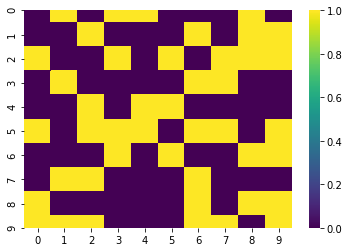

mag =  0.04000


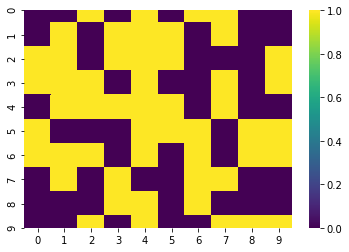

mag =  0.06000


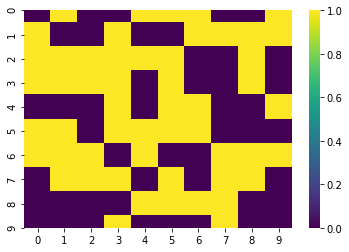

mag =  0.08000


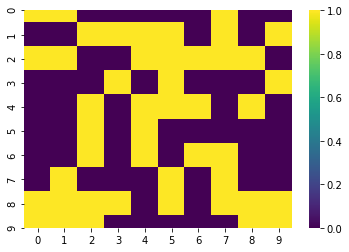

In [13]:
for j in range(15):
    p = torch.sigmoid(u_L010_high[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Sampling Ising states using the right singular vectors $v$

mag =  0.02000


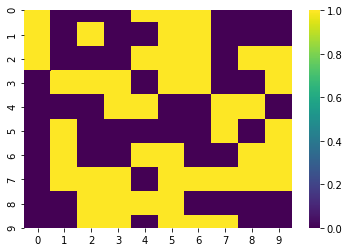

mag =  0.00000


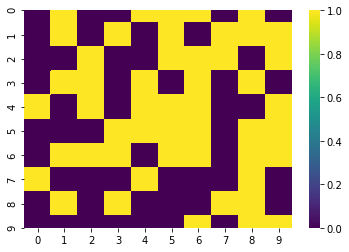

mag =  0.16000


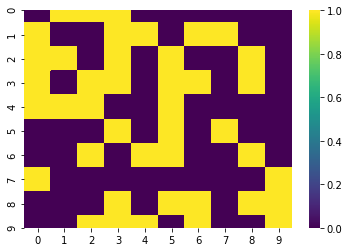

mag =  0.04000


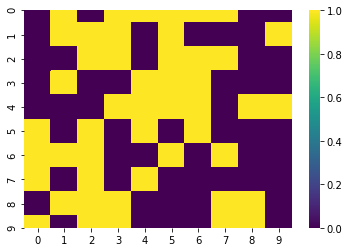

mag =  0.02000


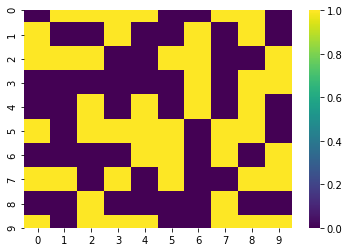

mag =  0.06000


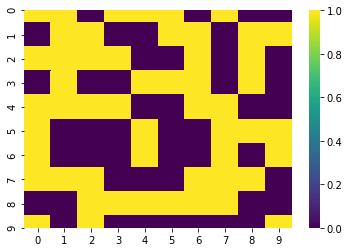

mag =  0.16000


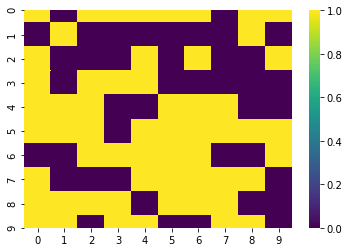

mag =  0.10000


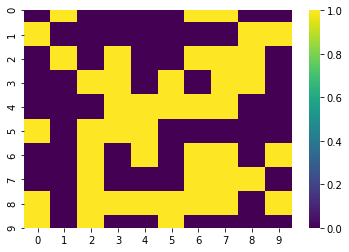

mag =  0.18000


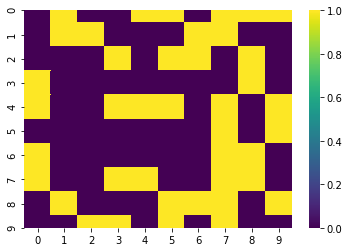

mag =  0.04000


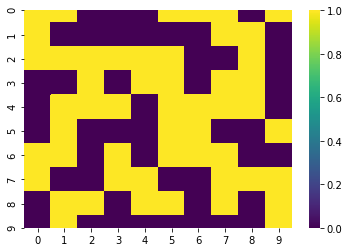

mag =  0.26000


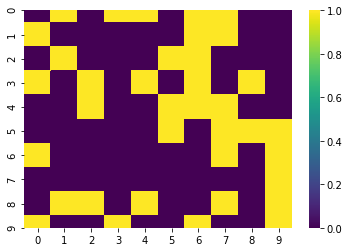

mag =  0.02000


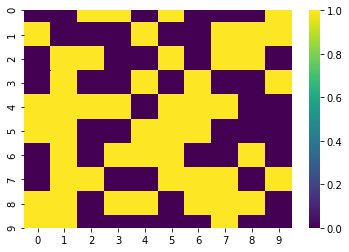

mag =  0.14000


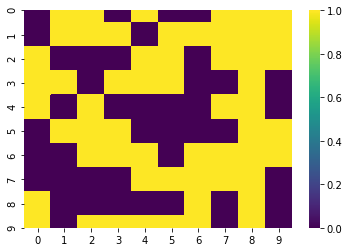

mag =  0.08000


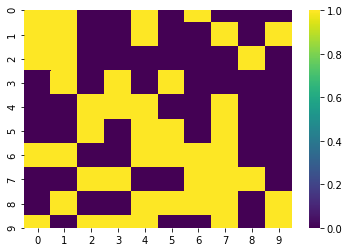

mag =  0.06000


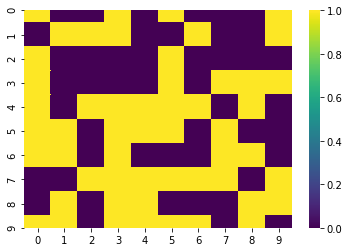

In [14]:
for j in range(15):
    p = torch.sigmoid(v_L010_high[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Eigenvalues of ${\cal W} $

There are imaginary eigenvalues.

In [45]:
eigen_val_vec_high_W = torch.eig(W_L010_high, eigenvectors= True)

In [46]:
eigen_low_W = eigen_val_vec_high_W[0]
eigen_low_W

tensor([[-3.5493,  2.3838],
        [-3.5493, -2.3838],
        [-2.9351,  2.9960],
        [-2.9351, -2.9960],
        [ 3.8985,  0.0000],
        [ 3.6013,  0.8718],
        [ 3.6013, -0.8718],
        [-0.3055,  3.9649],
        [-0.3055, -3.9649],
        [-4.0073,  0.0000],
        [ 3.1874,  1.7501],
        [ 3.1874, -1.7501],
        [ 2.2647,  3.1922],
        [ 2.2647, -3.1922],
        [-1.1248,  3.7127],
        [-1.1248, -3.7127],
        [ 2.2355,  3.1178],
        [ 2.2355, -3.1178],
        [ 3.5779,  0.0000],
        [ 0.8091,  3.7009],
        [ 0.8091, -3.7009],
        [ 1.4446,  3.4790],
        [ 1.4446, -3.4790],
        [-3.8991,  0.0000],
        [-3.1378,  2.0483],
        [-3.1378, -2.0483],
        [ 3.1068,  0.9312],
        [ 3.1068, -0.9312],
        [ 2.9890,  1.3082],
        [ 2.9890, -1.3082],
        [-1.6482,  3.0022],
        [-1.6482, -3.0022],
        [ 0.4672,  3.3615],
        [ 0.4672, -3.3615],
        [-3.4040,  1.1364],
        [-3.4040, -1

### Analysis of $ {\cal W} {\cal W}^{T}$

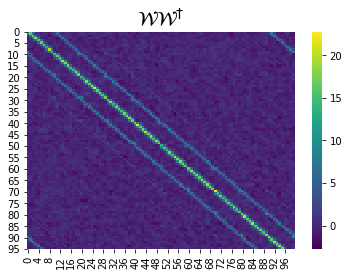

In [29]:
WW = torch.mm(W_L010_high.t(), W_L010_high)
sns.heatmap(WW, linewidths= 0.0, cmap= 'viridis')
plt.title('${\cal W} {\cal W}^{\dag}$', fontsize= 20)
plt.show()

#### Eigenvalues of ${\cal W} {\cal W}^T $

In [30]:
eigen_val_vec_high = torch.eig(W_L010_high*W_L010_high.t(), eigenvectors= True)

In [31]:
eigen_high = eigen_val_vec_high[0][:,0]

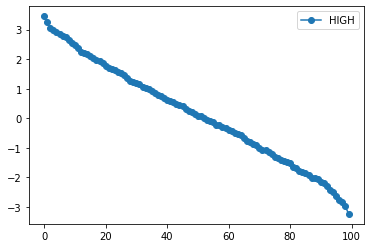

In [54]:
plt.plot(x, np.sort(eigen_high.numpy()), label= 'HIGH', marker= 'o')
plt.legend()
plt.show()

## $T=0$ and $T=\infty$

### Analysis of $ {\cal W}$

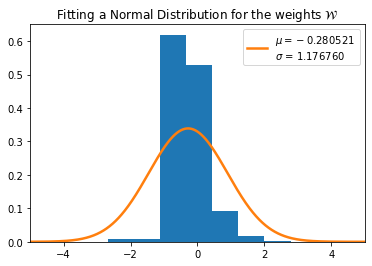

In [64]:
W_ = W_L010_low_high.numpy().reshape((W_L010_low_high.shape[0]*W_L010_low_high.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma$ = %f' % (muW_, sigmaW_ ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.xlim([-5, 5])
plt.show()

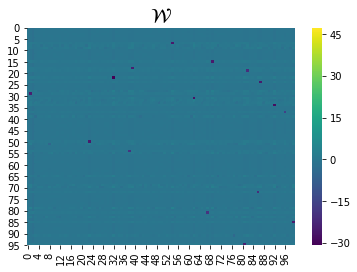

In [6]:
plt.title('${\cal W} $', fontsize= 20)
sns.heatmap(W_L010_low_high, linewidths= 0.0, cmap= 'viridis')
plt.show()

#### SVD of ${\cal W} $

In [8]:
u_L010_low_high, s_L010_low_high, v_L010_low_high = torch.svd(W_L010_low_high)

[]

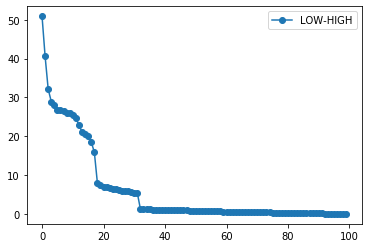

In [66]:
plt.plot(s_L010_low_high.numpy(), label= 'LOW-HIGH', marker= 'o')
plt.legend()
plt.plot()

#### Sampling Ising states using the left singular vectors $u$

mag =  0.02000


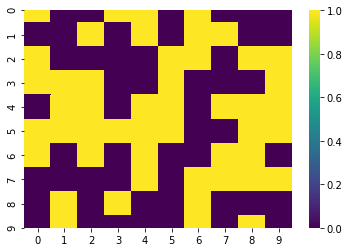

mag =  0.00000


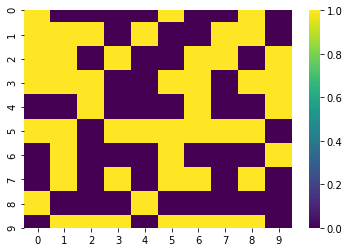

mag =  0.18000


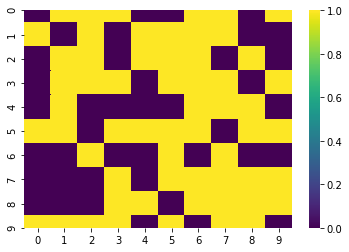

mag =  0.04000


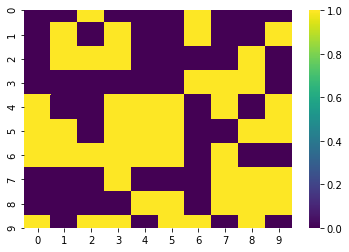

mag =  0.02000


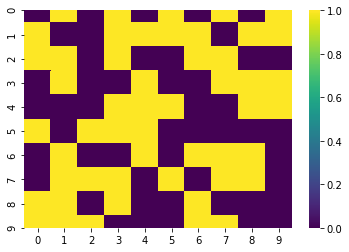

mag =  0.06000


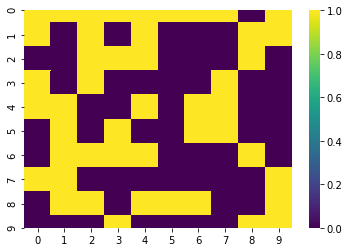

mag =  0.10000


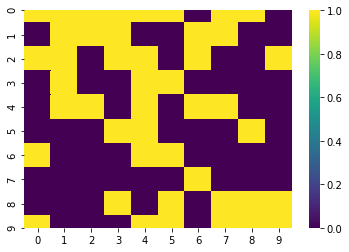

mag =  0.04000


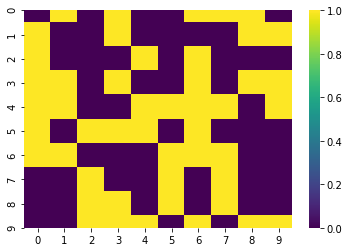

mag =  0.00000


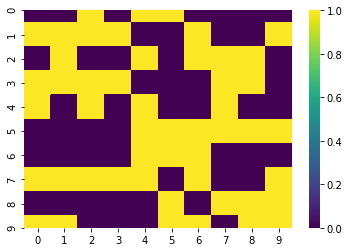

mag =  0.00000


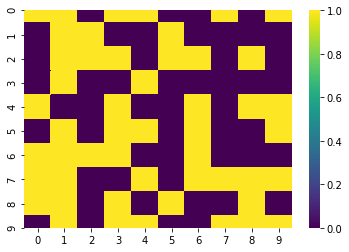

mag =  0.08000


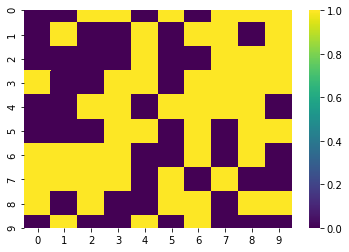

mag =  0.20000


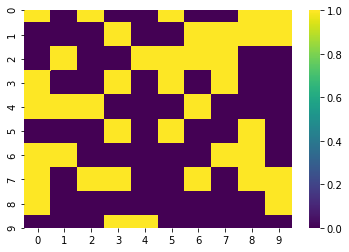

mag =  0.06000


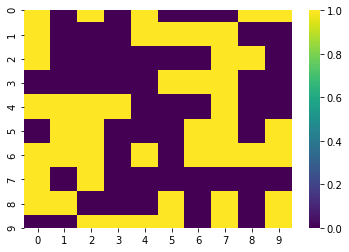

mag =  0.16000


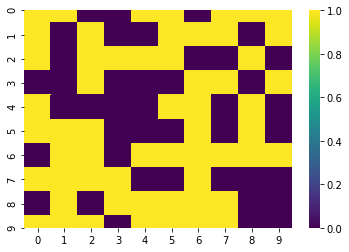

mag =  0.00000


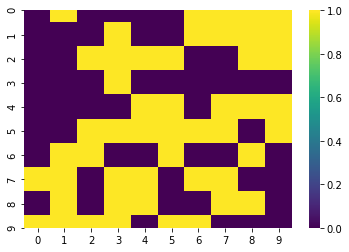

In [15]:
for j in range(15):
    p = torch.sigmoid(u_L010_low_high[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Sampling Ising states using the right singular vectors $v$

mag =  0.04000


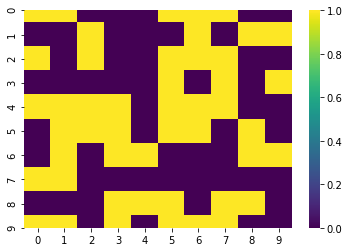

mag =  0.08000


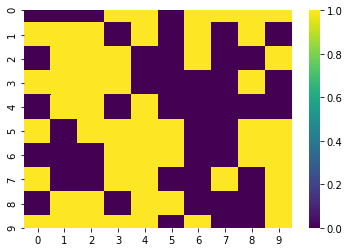

mag =  0.10000


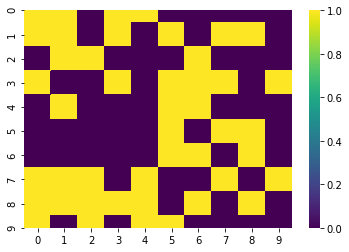

mag =  0.04000


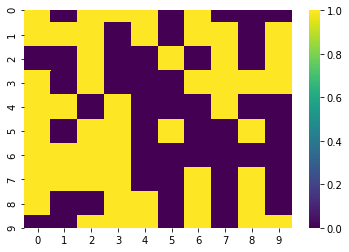

mag =  0.06000


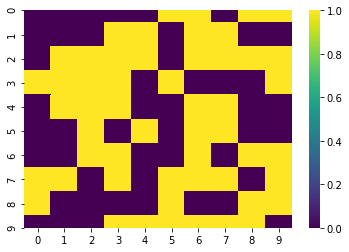

mag =  0.08000


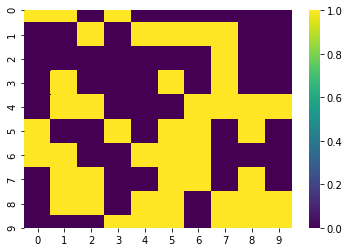

mag =  0.26000


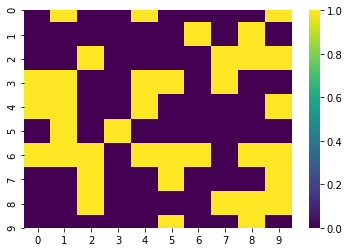

mag =  0.06000


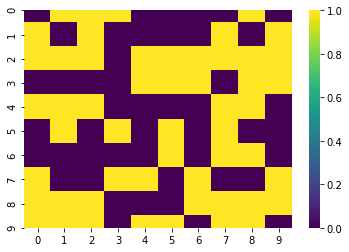

mag =  0.14000


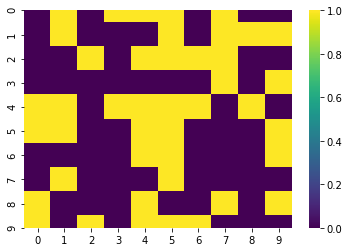

mag =  0.04000


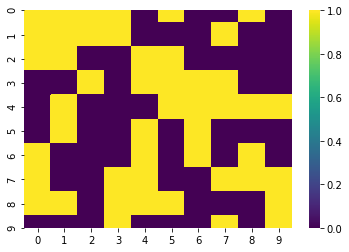

mag =  0.04000


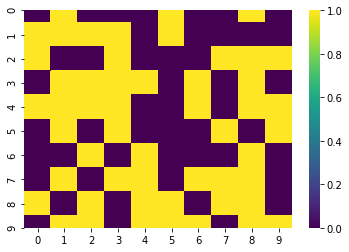

mag =  0.04000


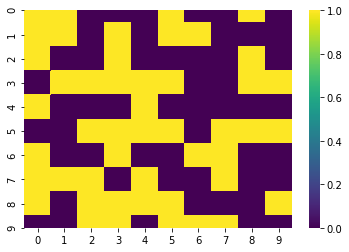

mag =  0.20000


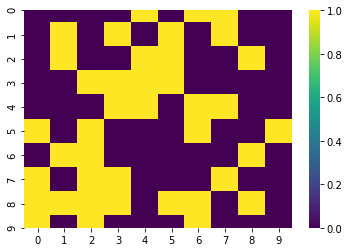

mag =  0.06000


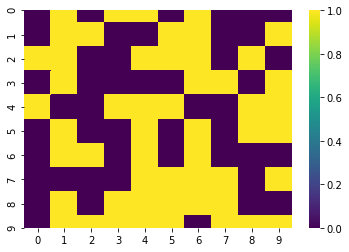

mag =  0.06000


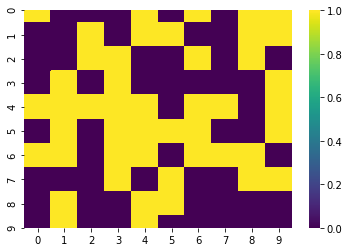

In [16]:
for j in range(15):
    p = torch.sigmoid(v_L010_low_high[j])
    rand_prob = torch.rand(p.size())
    state = F.relu( torch.sign( p - rand_prob ) ).reshape((10,10))
    mag = (2*state - 1 ).mean().abs().item()
    print('mag =  %.5f' % mag)
    sns.heatmap(state, linewidths= 0.0, cmap= 'viridis')
    plt.show()

#### Eigenvalues of ${\cal W} $

There are imaginary eigenvalues.

In [67]:
eigen_val_vec_low_high_W = torch.eig(W_L010_low_high, eigenvectors= True)

In [68]:
eigen_all_W = eigen_val_vec_low_high_W[0]
eigen_all_W

tensor([[-2.7560e+01,  0.0000e+00],
        [ 7.9533e+00,  0.0000e+00],
        [ 4.6089e+00,  4.8634e+00],
        [ 4.6089e+00, -4.8634e+00],
        [ 6.6034e+00,  0.0000e+00],
        [-3.7016e+00,  4.6307e+00],
        [-3.7016e+00, -4.6307e+00],
        [-4.7363e+00,  2.3141e+00],
        [-4.7363e+00, -2.3141e+00],
        [-5.2590e+00,  0.0000e+00],
        [-4.7294e+00,  0.0000e+00],
        [ 3.8034e+00,  2.4111e+00],
        [ 3.8034e+00, -2.4111e+00],
        [ 1.6430e+00,  4.0497e+00],
        [ 1.6430e+00, -4.0497e+00],
        [-3.7947e+00,  1.3969e+00],
        [-3.7947e+00, -1.3969e+00],
        [-7.5734e-01,  3.5433e+00],
        [-7.5734e-01, -3.5433e+00],
        [-4.9498e-02,  3.6055e+00],
        [-4.9498e-02, -3.6055e+00],
        [-1.6000e+00,  3.1865e+00],
        [-1.6000e+00, -3.1865e+00],
        [ 3.2643e+00,  9.8179e-01],
        [ 3.2643e+00, -9.8179e-01],
        [ 2.0544e+00,  2.1912e+00],
        [ 2.0544e+00, -2.1912e+00],
        [-2.8676e+00,  4.803

### Analysis of $ {\cal W} {\cal W}^{T}$

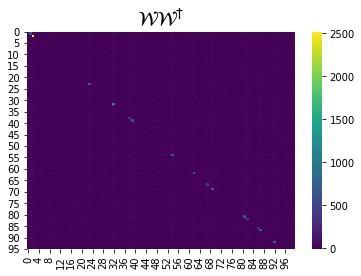

In [69]:
WW = torch.mm(W_L010_low_high.t(), W_L010_low_high)
sns.heatmap(WW, linewidths= 0.0, cmap= 'viridis')
plt.title('${\cal W} {\cal W}^{\dag}$', fontsize= 20)
plt.show()

#### Eigenvalues of ${\cal W} {\cal W}^T $

In [70]:
eigen_val_vec_low_high = torch.eig(W_L010_low_high*W_L010_low_high.t(), eigenvectors= True)

In [71]:
eigen_low_high = eigen_val_vec_low_high[0][:,0]

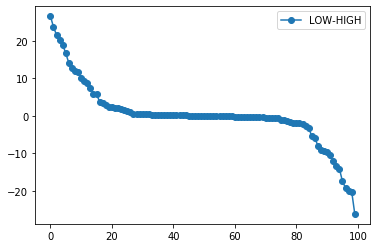

In [72]:
plt.plot(x, np.sort(eigen_low_high.numpy()), label= 'LOW-HIGH', marker= 'o')
plt.legend()
plt.show()

# Comparing eigenvalues of $ {\cal W} {\cal W}^T$

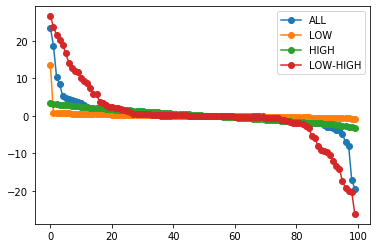

In [76]:
plt.plot(x, np.sort(eigen_ALL.numpy()), label= 'ALL', marker= 'o')
plt.plot(x, np.sort(eigen_LOW.numpy()), label= 'LOW', marker= 'o')
plt.plot(x, np.sort(eigen_high.numpy()), label= 'HIGH', marker= 'o')
plt.plot(x, np.sort(eigen_low_high.numpy()), label= 'LOW-HIGH', marker= 'o')
plt.legend()
plt.show()

# Comparing singular values of $ {\cal W}$

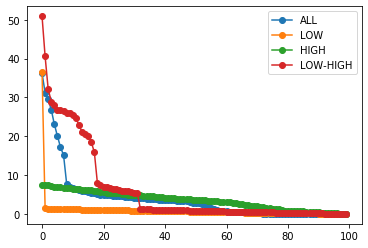

In [75]:
plt.plot(x, np.sort(s_L010_all.numpy()), label= 'ALL', marker= 'o')
plt.plot(x, np.sort(s_L010_low.numpy()), label= 'LOW', marker= 'o')
plt.plot(x, np.sort(s_L010_high.numpy()), label= 'HIGH', marker= 'o')
plt.plot(x, np.sort(s_L010_low_high.numpy()), label= 'LOW-HIGH', marker= 'o')
plt.legend()
plt.show()